# Data Exploration

In [42]:
# Import necessary libraries
from sqlalchemy import create_engine
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Establish connection to the SQLite database
engine = create_engine('sqlite:///../data/bitcoin_data.sqlite')

# Load Bitcoin data into a DataFrame
bitcoin_df = pd.read_sql_table('bitcoin_prices', engine, index_col='Date')

# Establish connection to the S&P 500 SQLite database
engine_sp500 = create_engine('sqlite:///../data/sp500_data.sqlite')

# Load S&P 500 data into a DataFrame
sp500_df = pd.read_sql_table('sp500_prices', engine_sp500, index_col='Date')

In [4]:
# Display sample data to ensure successful loading
print("Bitcoin Data Sample:")
print(bitcoin_df.head())

print("\nS&P 500 Data Sample:")
print(sp500_df.head())

Bitcoin Data Sample:
            SNo         High         Low         Open        Close  Volume  \
Date                                                                         
2013-12-05  221  1154.359985  897.109985  1152.729980  1045.109985     0.0   
2013-12-06  222  1042.380005  829.450012  1042.380005   829.450012     0.0   
2013-12-07  223   854.640015  640.219971   835.320007   698.229980     0.0   
2013-12-08  224   802.510010  670.880005   697.309998   795.869995     0.0   
2013-12-09  225   921.929993  780.900024   793.799988   893.190002     0.0   

               Marketcap  
Date                      
2013-12-05  1.262691e+10  
2013-12-06  1.002565e+10  
2013-12-07  8.442962e+09  
2013-12-08  9.627500e+09  
2013-12-09  1.080872e+10  

S&P 500 Data Sample:
              price
Date               
2013-12-05  1785.03
2013-12-06  1805.09
2013-12-09  1808.37
2013-12-10  1802.62
2013-12-11  1782.22


## Bitcoin data exploration

In [5]:
# Basic Overview
print(bitcoin_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2771 entries, 2013-12-05 to 2021-07-06
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2771 non-null   int64  
 1   High       2771 non-null   float64
 2   Low        2771 non-null   float64
 3   Open       2771 non-null   float64
 4   Close      2771 non-null   float64
 5   Volume     2771 non-null   float64
 6   Marketcap  2771 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 173.2 KB
None


In [6]:
# Descriptive Statistics for Bitcoin Data
bitcoin_stats = bitcoin_df.describe()
print("Bitcoin Data Statistics:")
print(bitcoin_stats)

Bitcoin Data Statistics:
               SNo          High           Low          Open         Close  \
count  2771.000000   2771.000000   2771.000000   2771.000000   2771.000000   
mean   1606.000000   7424.536734   6986.456521   7216.888621   7228.562194   
std     800.063123  11936.490381  11140.436034  11571.727105  11582.024690   
min     221.000000    211.731003    171.509995    176.897003    178.102997   
25%     913.500000    512.787994    485.345490    500.900009    499.316498   
50%    1606.000000   3685.305600   3585.060000   3631.170193   3631.040039   
75%    2298.500000   9113.187824   8696.580334   8868.188966   8874.645214   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.771000e+03  2.771000e+03  
mean   1.177223e+10  1.302897e+11  
std    1.936318e+10  2.163922e+11  
min    0.000000e+00  2.444379e+09  
25%    4.683815e+07  6.957984e+09  
50%    1.976040e+09  6.306514e+10  
75%    1.748935e+10 

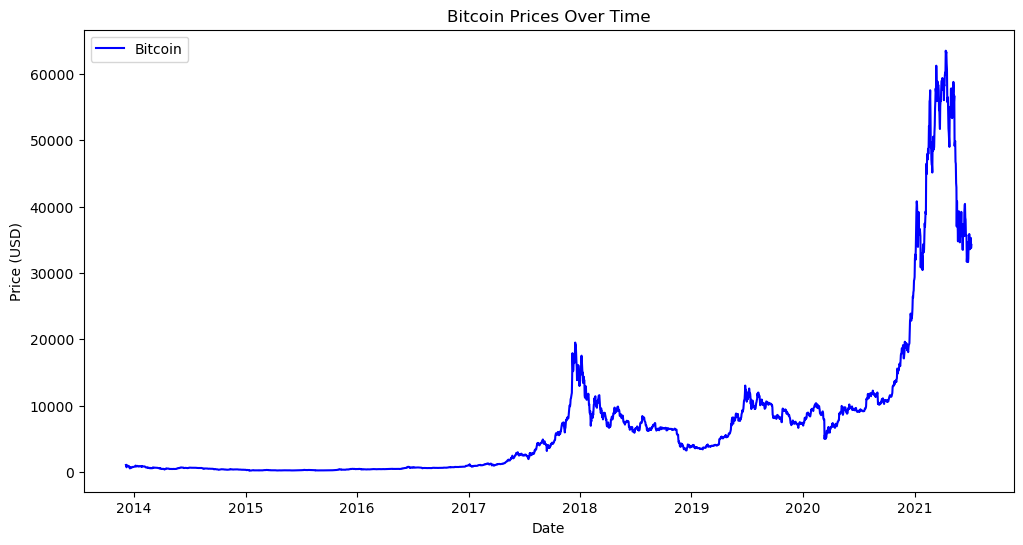

In [7]:
# Time Series Visualization for Bitcoin Prices
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Close'], label='Bitcoin', color='blue')
plt.title('Bitcoin Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

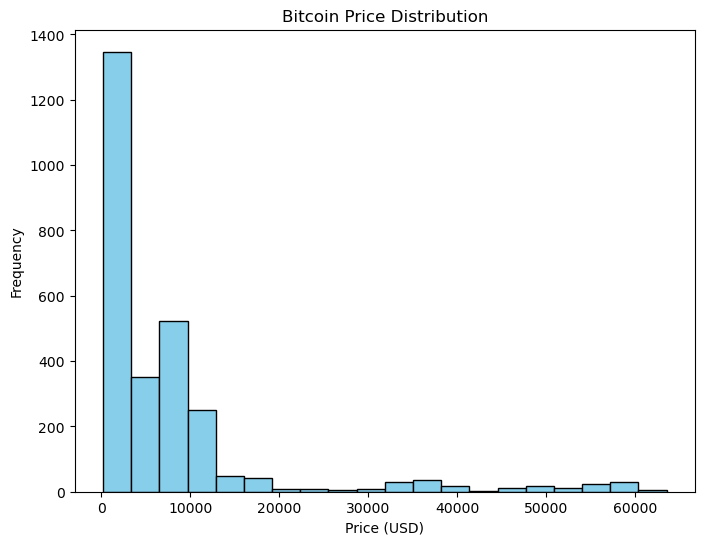

In [8]:
# Histogram for Bitcoin Price Distribution
plt.figure(figsize=(8, 6))
plt.hist(bitcoin_df['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Bitcoin Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

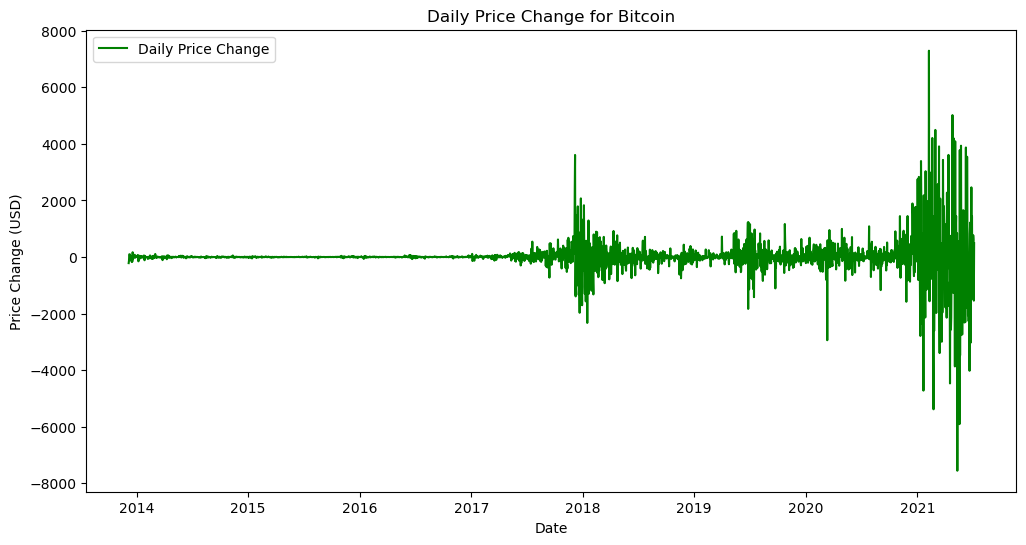

In [9]:
# Daily Price Change for Bitcoin
bitcoin_df['Price_Change'] = bitcoin_df['Close'].diff()
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Price_Change'], label='Daily Price Change', color='green')
plt.title('Daily Price Change for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price Change (USD)')
plt.legend()
plt.show()

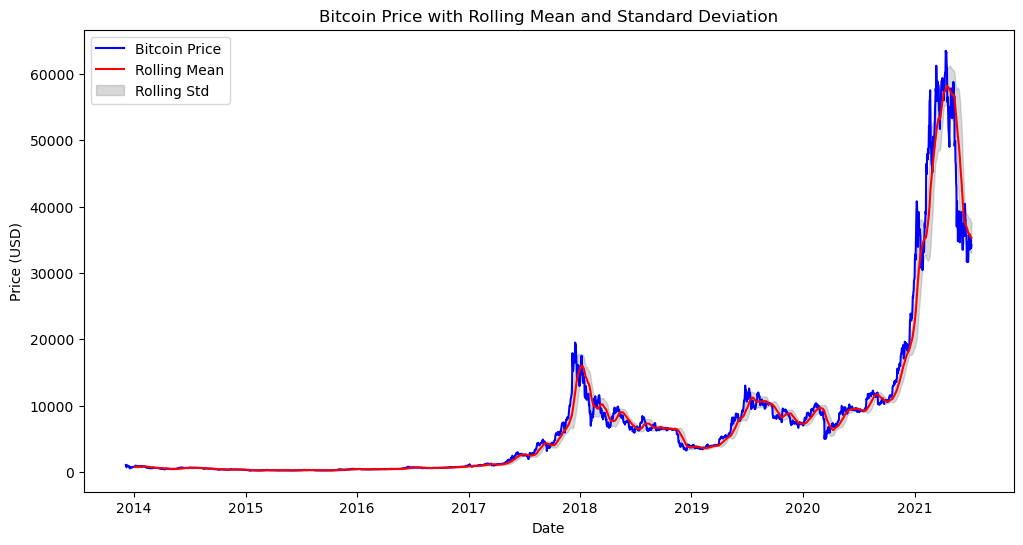

In [10]:
# Rolling Mean and Standard Deviation for Bitcoin Prices
window = 30  # Window for rolling statistics

bitcoin_df['Rolling_Mean'] = bitcoin_df['Close'].rolling(window=window).mean()
bitcoin_df['Rolling_Std'] = bitcoin_df['Close'].rolling(window=window).std()

plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Close'], label='Bitcoin Price', color='blue')
plt.plot(bitcoin_df.index, bitcoin_df['Rolling_Mean'], label='Rolling Mean', color='red')
plt.fill_between(bitcoin_df.index, bitcoin_df['Rolling_Mean'] - bitcoin_df['Rolling_Std'], bitcoin_df['Rolling_Mean'] + bitcoin_df['Rolling_Std'], color='gray', alpha=0.3, label='Rolling Std')
plt.title('Bitcoin Price with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

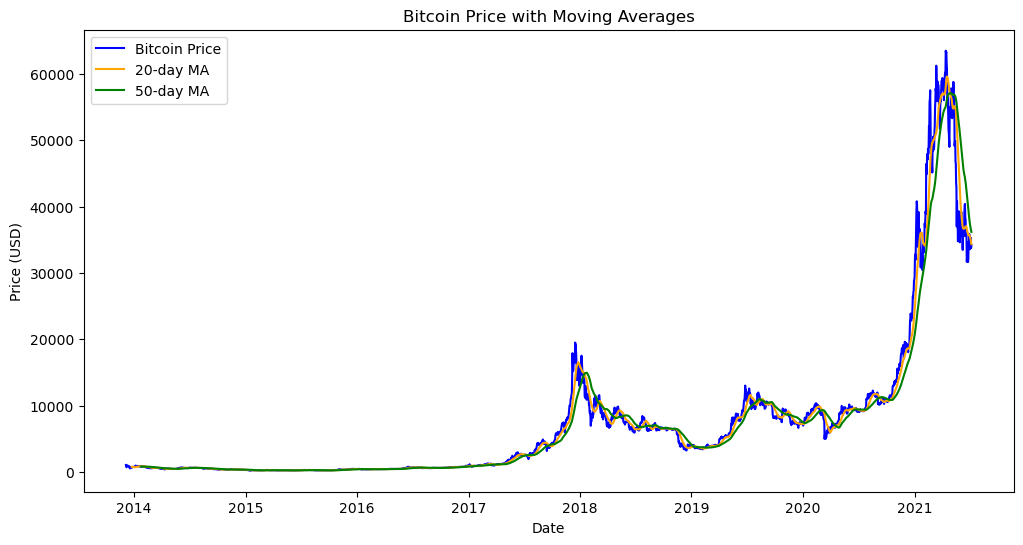

In [11]:
# Trading Signals: Moving Averages
short_window = 20  # Short-term moving average window
long_window = 50  # Long-term moving average window

bitcoin_df['Short_MA'] = bitcoin_df['Close'].rolling(window=short_window).mean()
bitcoin_df['Long_MA'] = bitcoin_df['Close'].rolling(window=long_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Close'], label='Bitcoin Price', color='blue')
plt.plot(bitcoin_df.index, bitcoin_df['Short_MA'], label=f'{short_window}-day MA', color='orange')
plt.plot(bitcoin_df.index, bitcoin_df['Long_MA'], label=f'{long_window}-day MA', color='green')
plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

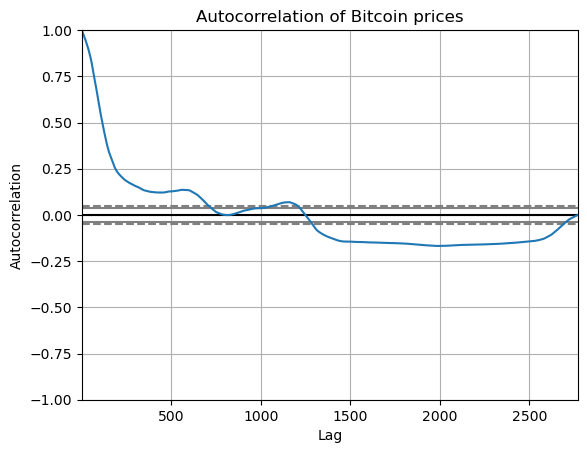

In [24]:
# Autocorrelation plot
autocorrelation_plot(bitcoin_df['Close'])
plt.title('Autocorrelation of Bitcoin prices')
plt.show()

## S&P 500 Data Exploration

In [12]:
# Basic Overview
print(sp500_df.info())

# Descriptive Statistics
print(sp500_df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1979 entries, 2013-12-05 to 2021-07-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1979 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB
None
             price
count  1979.000000
mean   2585.112092
std     607.266982
min    1741.890000
25%    2076.925000
50%    2476.550000
75%    2909.300000
max    4352.340000


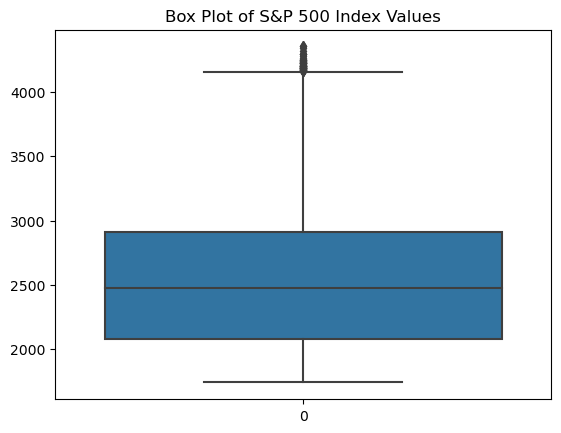

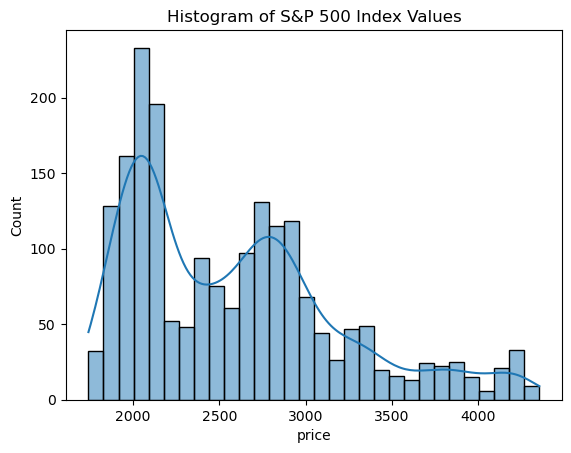

In [13]:
# Boxplot for overall distribution
sns.boxplot(data=sp500_df['price'])
plt.title('Box Plot of S&P 500 Index Values')
plt.show()

# Histogram for distribution
sns.histplot(sp500_df['price'], kde=True, bins=30)
plt.title('Histogram of S&P 500 Index Values')
plt.show()

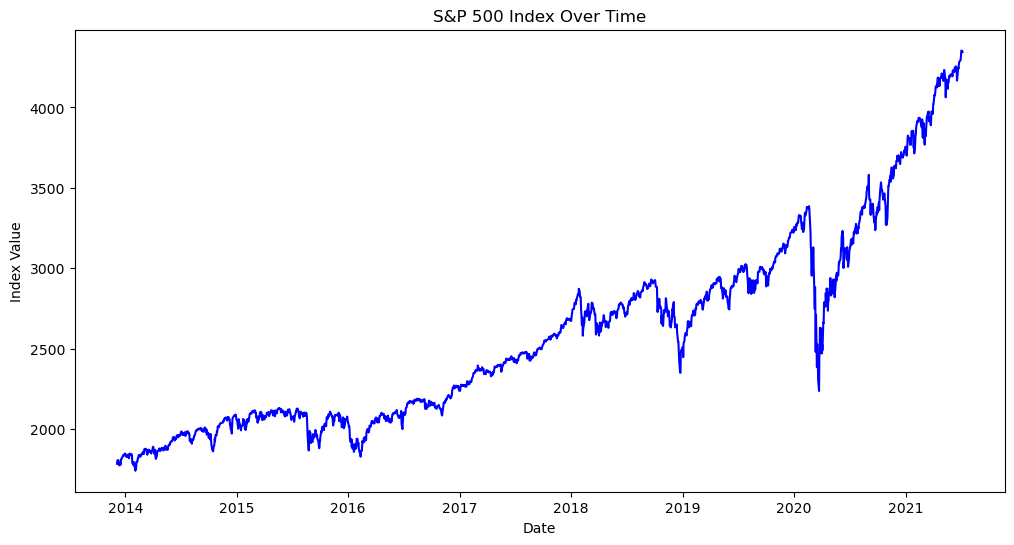

In [14]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(sp500_df.index, sp500_df['price'], color='blue')
plt.title('S&P 500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()

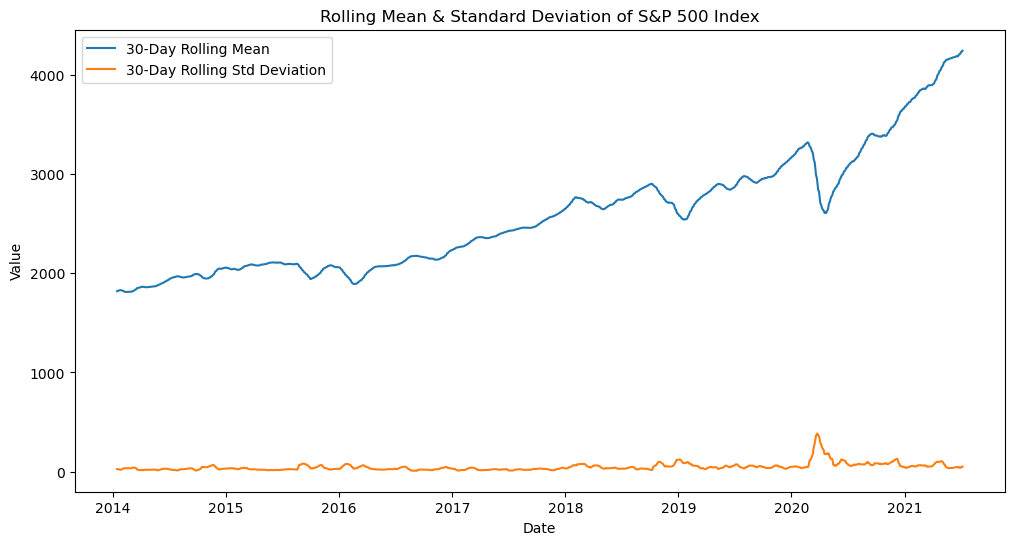

In [15]:
# Rolling mean and standard deviation
window_size = 30
sp500_df['Rolling_Mean'] = sp500_df['price'].rolling(window=window_size).mean()
sp500_df['Rolling_Std'] = sp500_df['price'].rolling(window=window_size).std()

plt.figure(figsize=(12,6))
plt.plot(sp500_df.index, sp500_df['Rolling_Mean'], label='30-Day Rolling Mean')
plt.plot(sp500_df.index, sp500_df['Rolling_Std'], label='30-Day Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation of S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

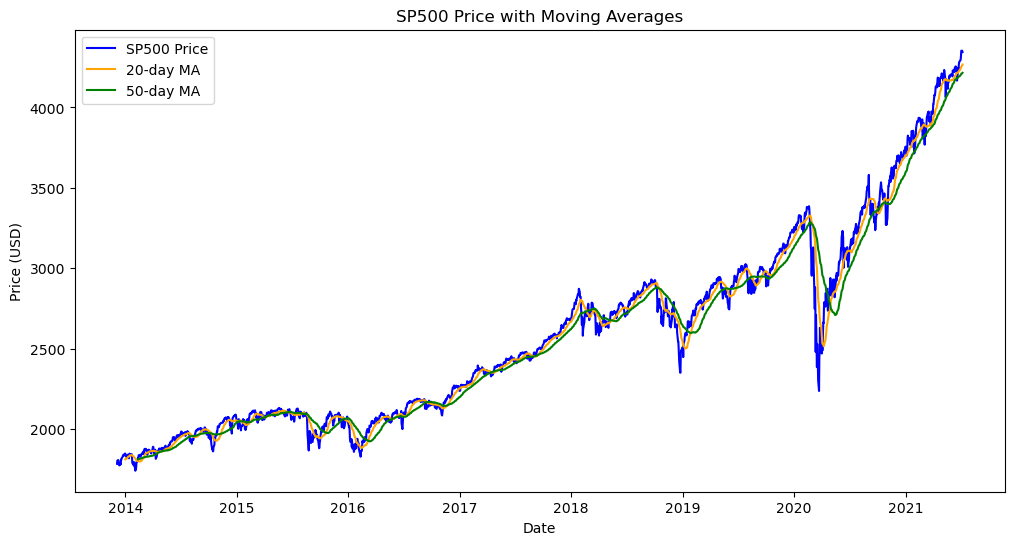

In [25]:
# Trading Signals: Moving Averages
short_window = 20  # Short-term moving average window
long_window = 50  # Long-term moving average window

sp500_df['Short_MA'] = sp500_df['price'].rolling(window=short_window).mean()
sp500_df['Long_MA'] = sp500_df['price'].rolling(window=long_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(sp500_df.index, sp500_df['price'], label='SP500 Price', color='blue')
plt.plot(sp500_df.index, sp500_df['Short_MA'], label=f'{short_window}-day MA', color='orange')
plt.plot(sp500_df.index, sp500_df['Long_MA'], label=f'{long_window}-day MA', color='green')
plt.title('SP500 Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

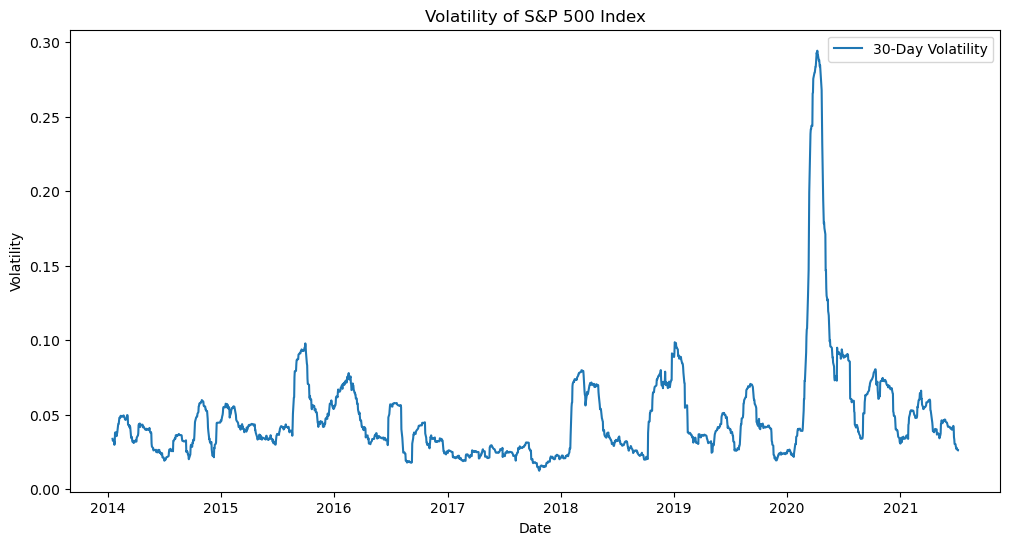

In [19]:
# Daily Returns and Volatility
sp500_df['Daily_Return'] = sp500_df['price'].pct_change()
sp500_df['Volatility'] = sp500_df['Daily_Return'].rolling(window=30).std() * np.sqrt(30)

plt.figure(figsize=(12,6))
plt.plot(sp500_df.index, sp500_df['Volatility'], label='30-Day Volatility')
plt.title('Volatility of S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

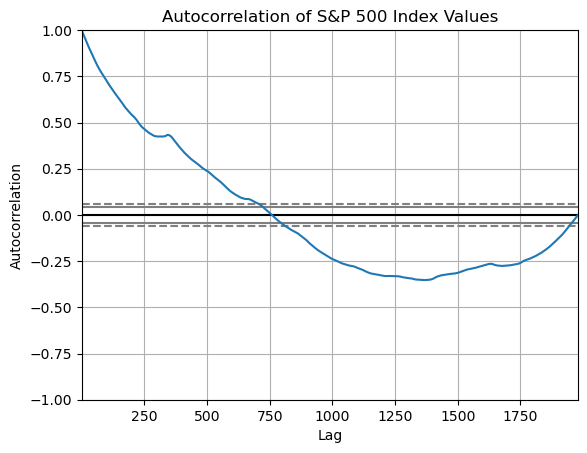

In [21]:
# Autocorrelation plot
autocorrelation_plot(sp500_df['price'])
plt.title('Autocorrelation of S&P 500 Index Values')
plt.show()

## Combined Exploratory Data Analysis

In [28]:
# Merging the datasets on the date column
combined_df = pd.merge(bitcoin_df.reset_index(), sp500_df.reset_index(), on='Date', how='inner')

# Check the last few rows of the combined dataframe
print(combined_df.tail())

           Date   SNo          High           Low          Open         Close  \
1974 2021-06-30  2985  36074.759757  34086.151878  35908.388054  35040.837249   
1975 2021-07-01  2986  35035.982712  32883.781226  35035.982712  33572.117653   
1976 2021-07-02  2987  33939.588699  32770.680780  33549.600177  33897.048590   
1977 2021-07-05  2990  35284.344430  33213.661034  35284.344430  33746.002456   
1978 2021-07-06  2991  35038.536363  33599.916169  33723.509655  34235.193451   

            Volume     Marketcap  Price_Change  Rolling_Mean_x  Rolling_Std_x  \
1974  3.405904e+10  6.568525e+11   -826.940487    35845.154856    2375.493436   
1975  3.783896e+10  6.293393e+11  -1468.719596    35741.394627    2405.343207   
1976  3.872897e+10  6.354508e+11    324.930937    35618.790261    2402.387408   
1977  2.672155e+10  6.326962e+11  -1541.777310    35353.696946    2313.860293   
1978  2.650126e+10  6.418992e+11    489.190995    35299.457471    2320.586805   

        Short_MA_x     Lon

In [44]:
# Basic information and statistics
print(combined_df.info())
print(combined_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 1978
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1979 non-null   datetime64[ns]
 1   SNo                 1979 non-null   int64         
 2   High                1979 non-null   float64       
 3   Low                 1979 non-null   float64       
 4   Open                1979 non-null   float64       
 5   Close               1979 non-null   float64       
 6   Volume              1979 non-null   float64       
 7   Marketcap           1979 non-null   float64       
 8   Price_Change        1978 non-null   float64       
 9   Rolling_Mean_x      1958 non-null   float64       
 10  Rolling_Std_x       1958 non-null   float64       
 11  Short_MA_x          1966 non-null   float64       
 12  Long_MA_x           1944 non-null   float64       
 13  price               1979 non-null   float64     

In [43]:
# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Normalizing Bitcoin prices
combined_df['Normalized_Bitcoin'] = scaler.fit_transform(combined_df[['Close']])

# Normalizing S&P 500 prices
combined_df['Normalized_SP500'] = scaler.fit_transform(combined_df[['price']])

/Users/eminmammadov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/eminmammadov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/eminmammadov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/eminmammadov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name'

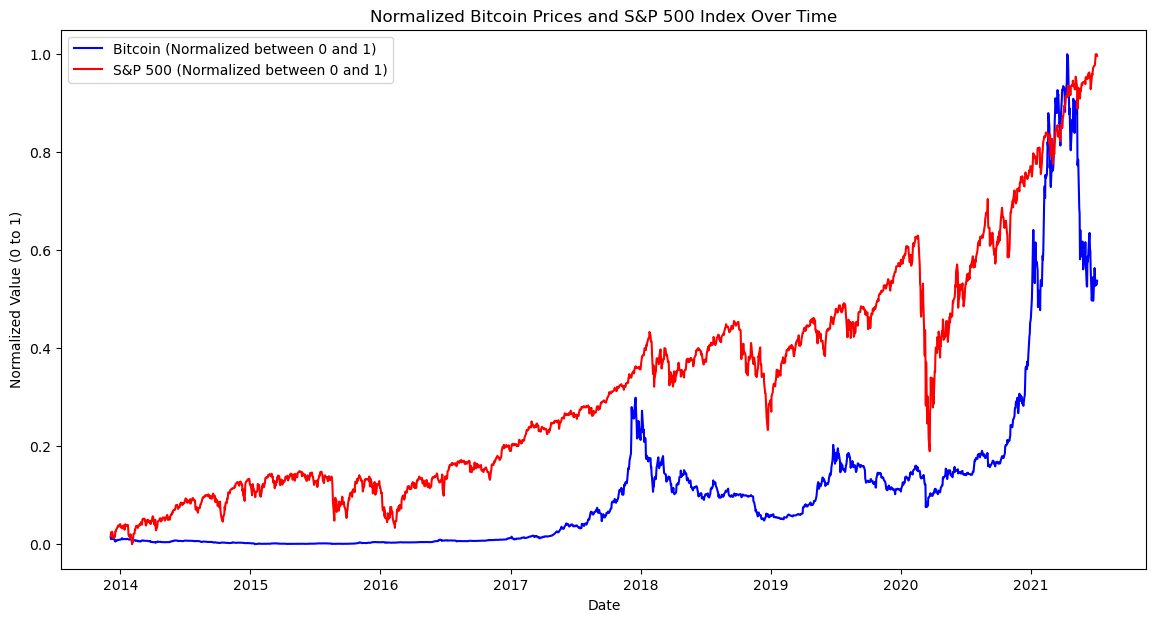

In [46]:
plt.figure(figsize=(14, 7))

# Plotting the normalized Bitcoin prices
plt.plot(combined_df['Date'], combined_df['Normalized_Bitcoin'], label='Bitcoin', color='blue')

# Plotting the normalized S&P 500 prices
plt.plot(combined_df['Date'], combined_df['Normalized_SP500'], label='S&P 500', color='red')

plt.title('Normalized Bitcoin Prices and S&P 500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value (0 to 1)')
plt.legend()
plt.show()

Pearson Correlation Coefficient: 0.8403059320026367


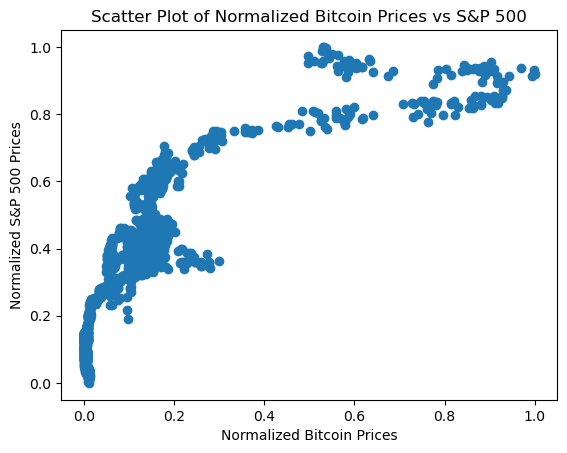

In [49]:
# Pearson correlation coefficient
pearson_corr = combined_df['Normalized_Bitcoin'].corr(combined_df['Normalized_SP500'])
print(f"Pearson Correlation Coefficient: {pearson_corr}")
plt.scatter(combined_df['Normalized_Bitcoin'], combined_df['Normalized_SP500'])
plt.title('Scatter Plot of Normalized Bitcoin Prices vs S&P 500')
plt.xlabel('Normalized Bitcoin Prices')
plt.ylabel('Normalized S&P 500 Prices')
plt.show()

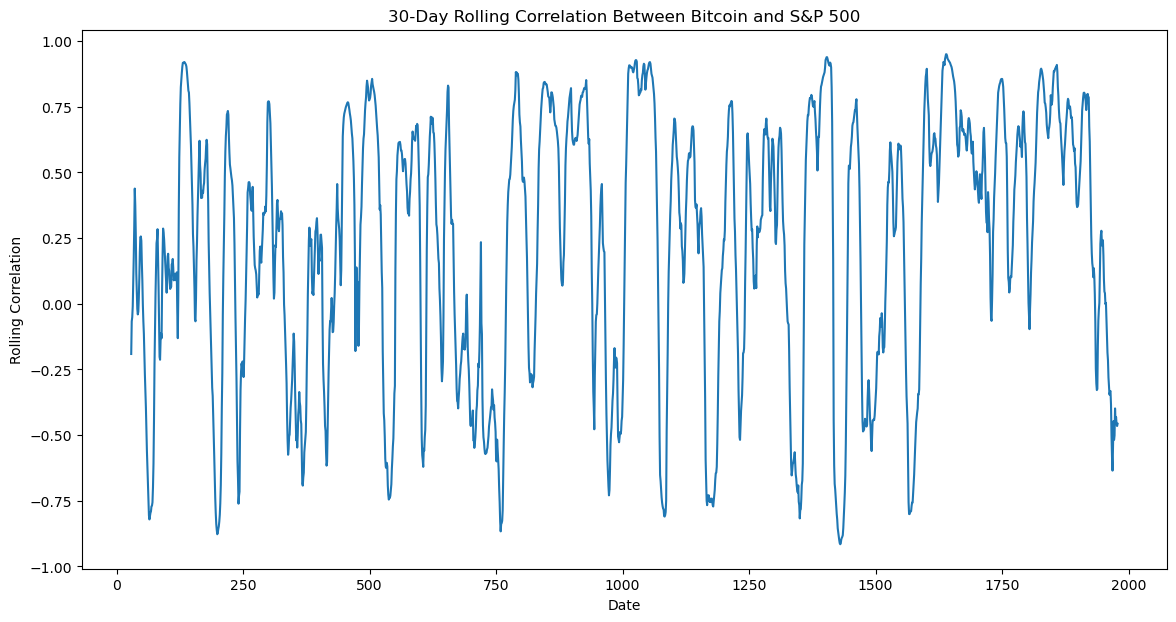

In [50]:
# Rolling correlation with a window of 30 days
rolling_corr = combined_df['Normalized_Bitcoin'].rolling(window=30).corr(combined_df['Normalized_SP500'])

plt.figure(figsize=(14,7))
rolling_corr.plot()
plt.title('30-Day Rolling Correlation Between Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.show()

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Bitcoin Prices
btc_decompose = seasonal_decompose(combined_df['Normalized_Bitcoin'], model='additive', period=30)
btc_trend = btc_decompose.trend
btc_seasonal = btc_decompose.seasonal
btc_residual = btc_decompose.resid

# Decompose S&P 500 Prices
sp500_decompose = seasonal_decompose(combined_df['Normalized_SP500'], model='additive', period=30)
sp500_trend = sp500_decompose.trend
sp500_seasonal = sp500_decompose.seasonal
sp500_residual = sp500_decompose.resid

In [52]:
# Calculate the Pearson correlation of the residuals
residual_corr = btc_residual.corr(sp500_residual)
print(f"Correlation of Residuals: {residual_corr}")

Correlation of Residuals: 0.1775638980869279
